In [4]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import scipy
from scipy.optimize import curve_fit
import glob
import os
%matplotlib inline

In [5]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [9]:

#pip install tabulate

#use of glob to get all .txt files in the folder
path = os.getcwd()
txt_files = glob.glob(os.path.join(path, "*.txt"))
argon_data_frames = {}
helium_data_frames = {}

for file in txt_files: 
    df = pd.read_csv(file)
    df = df.drop(columns='Unnamed: 5')
    df = df.dropna(axis =0)
    df_columns = df.keys()

    df = df.astype('float64')

    #df.plot(df_columns[0], df_columns[1], title = file)
#     print(df[df_columns[1]], df[df_columns[0]])
    if "Helium" in file: 
       
        helium_data_frames[file] =  df
    else: 

        argon_data_frames[file]= df
        

#/Users/denissecordovacarrizales/Documents/Physics_191/Plasma/Data/IR/Helium1000V845mT-60-0range1step.txt
#There are only two files with good data. This file is the best one.  


m_e = 9.10938356 * 10**(-31)
m_i = (6.6335209 * 10**(-26)) - (9.10938356 * 10**(-31)) #neutral minus electron
k = 8.617333262145 * 10**(-5) #electronvolts The k constant actually doesn't matter that much because it gets cancelled out in line 66
e = 1.60217662 * 10**(-19) #charge of electron in coloumbs

def exponential(V_bias, V_plasma, T_e):
    """ function we are trying to fit to
    """
    I_electron = np.exp(-e*(V_plasma - V_bias)/(k*T_e))
    return I_electron                                                                                                                          
                                                                                                                                     

IV_array = helium_data_frames["/Users/denissecordovacarrizales/Documents/Physics_191/Plasma/Data/IR/Helium1000V845mT-60-0range1step.txt"][df_columns[0:2]].to_numpy()
#current in first column. voltage in second column

shape = int(np.shape(IV_array)[0])

current_min = shape - shape%6 # the positive current starts in the last sixth of the array. we can only use positive current because the logarithm input in line 68 cannot be negative
current_max = shape 




linear_current_array = np.log(IV_array[current_min: current_max,1])#according to Wissel paper 
linear_ansatz_T_e = np.gradient(linear_current_array, 1) * 1/k #according to Wissel paper 
linear_ansatz_T_e = np.average(linear_ansatz_T_e) #guess of the electron temperature. just approximating to first order with an average 


print(linear_ansatz_T_e)
V_float_ansatz = -40 #the voltage where the current turns positive. found it by eye
V_plasma_ansatz = V_float_ansatz + (k*linear_ansatz_T_e/2)*np.log(2*m_i/(np.pi*m_e)) #from Wissel paper 
#fit = scipy.optimize.curve_fit(exponential, helium_data_frames["/Users/denissecordovacarrizales/Documents/Physics_191/Plasma/Data/IR/Helium1000V845mT-60-0range1step.txt"][df_columns[0]], helium_data_frames["/Users/denissecordovacarrizales/Documents/Physics_191/Plasma/Data/IR/Helium1000V845mT-60-0range1step.txt"][df_columns[1]] , [V_plasma_ansatz, linear_ansatz_T_e ])
#print(fit)

#plt.plot(fit, IV_array[:, 1])

1932.1415445525677


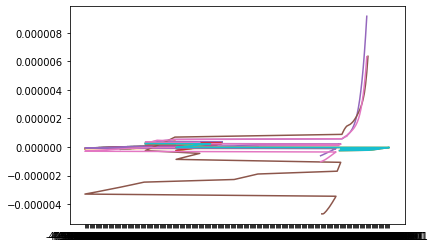

In [4]:
import matplotlib.pyplot as plt
for i in range(len(data_frames)):
#     print(type(i))
#     print(i.keys())
    probe_voltage = data_frames[i]['probe voltage (V)']
    probe_current = data_frames[i][' probe current (A)']
    plt.plot(probe_voltage, probe_current)
    

In [5]:
len(data_frames[0])

51

In [6]:
data_frames[0][' probe current (A)']

0    -1.086762e-07
1    -9.301785e-08
2    -8.140054e-08
3    -7.938017e-08
4    -7.786470e-08
5    -7.382392e-08
6    -6.170146e-08
7    -6.220656e-08
8    -6.018613e-08
9    -5.715553e-08
10   -5.412491e-08
11   -5.463003e-08
12   -5.058917e-08
13   -4.553819e-08
14   -4.048713e-08
15   -3.846672e-08
16   -3.543610e-08
17   -3.543609e-08
18   -3.038507e-08
19   -2.886974e-08
20   -2.179831e-08
21   -1.977791e-08
22   -1.674729e-08
23   -1.573707e-08
24   -1.119116e-08
25   -5.635015e-09
26   -6.645222e-09
27   -6.140118e-09
28   -5.839865e-10
29    4.971738e-09
30    2.951529e-09
31    6.486892e-09
32    8.507100e-09
33    1.153741e-08
34    1.153741e-08
35    1.355763e-08
36    1.759803e-08
37    1.961825e-08
38    2.163845e-08
39    2.113339e-08
40    2.214350e-08
41    2.870917e-08
42    2.971928e-08
43    3.325464e-08
44    2.618388e-08
45    3.325463e-08
46    3.527483e-08
47    3.577989e-08
48    4.083040e-08
49    3.729503e-08
50    5.042640e-08
Name:  probe current (A), dtype